In [ ]:
!pip install -q kaggle
from google.colab import files

# Upload your Kaggle API key (kaggle.json) file
files.upload()

# Move the uploaded file to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the Kaggle API key
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d sid321axn/malicious-urls-dataset

 89% 15.0M/16.9M [00:01<00:00, 19.3MB/s]
100% 16.9M/16.9M [00:01<00:00, 13.0MB/s]


In [ ]:
!ls

drive  malicious-urls-dataset.zip  sample_data


In [ ]:
!unzip malicious-urls-dataset.zip

Archive:  malicious-urls-dataset.zip
  inflating: malicious_phish.csv     


In [ ]:
!ls

drive  malicious_phish.csv  malicious-urls-dataset.zip	sample_data


In [ ]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
df=pd.read_csv('malicious_phish.csv')

In [ ]:
df.head()

url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement

In [ ]:
pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
import tld

In [ ]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

#pip install googlesearch-python

from googlesearch import search

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))
#Hostname Length

def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

df['count-letters']= df['url'].apply(lambda i: letter_count(i))

# pip install tld

from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [ ]:
df.head()

url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  google_index  count.  count-www  count@  count_dir  \
0             0             1       2          0       0          0   
1             0             1       2          0       0          2   
2             0             1       2          0       0          3   
3             1             1       3          1       0          1   
4             1             1       2          0       0          1   

   count_embed_domian  ...  count-  count=  url_length  hostname_length  \
0                   0  ...       1       0          16                0   
1                   0  ...       0       0          35                0   
2                   0  ...       0       0          31                0   
3                   0  ...       1       4          88               21   
4                   0  ...       1       3         235               23   

   sus_url  count-digits  count-letters  fd_length   tld  tld_length  
0        0             0             13          0  None          -1  
1        0             1             29          5  None          -1  
2        0             1             25          7  None          -1  
3        0             7             63          9    be           2  
4        0            22            199          9   net           3  

[5 rows x 25 columns]

In [ ]:
columns_to_drop = ['url', 'google_index', 'tld']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.head()

type  use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0    phishing          0             0       2          0       0          0   
1      benign          0             0       2          0       0          2   
2      benign          0             0       2          0       0          3   
3  defacement          0             1       3          1       0          1   
4  defacement          0             1       2          0       0          1   

   count_embed_domian  short_url  count-https  ...  count?  count-  count=  \
0                   0          0            0  ...       0       1       0   
1                   0          0            0  ...       0       0       0   
2                   0          0            0  ...       0       0       0   
3                   0          0            0  ...       1       1       4   
4                   0          0            0  ...       1       1       3   

   url_length  hostname_length  sus_url  count-digits  count-letters  \
0          16                0        0             0             13   
1          35                0        0             1             29   
2          31                0        0             1             25   
3          88               21        0             7             63   
4         235               23        0            22            199   

   fd_length  tld_length  
0          0          -1  
1          5          -1  
2          7          -1  
3          9           2  
4          9           3  

[5 rows x 22 columns]

# **T-Test**

In [ ]:
# Separate data into two groups: phishing and benign
phishing_urls = df[df['type'] == 'phishing'].drop('type', axis=1)
benign_urls = df[df['type'] == 'benign'].drop('type', axis=1)


In [ ]:
from scipy.stats import ttest_ind

# Perform two-sample Z-test for each feature
for feature in df.columns[1:]:  # Exclude 'type' column
    t_stat, p_value = ttest_ind(phishing_urls[feature], benign_urls[feature])

    # Define the significance level (alpha)
    alpha = 0.05

    # Print the results for each feature
    print(f'\nFeature: {feature}')
    print(f't-statistic: {t_stat}')
    print(f'P-value: {p_value}')

    # Check for statistical significance
    if p_value < alpha:
        print(f"Reject the null hypothesis: There is a significant difference in {feature} between phishing and benign URLs.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in {feature} between phishing and benign URLs.")


Feature: use_of_ip
t-statistic: 32.653711717647965
P-value: 1.22355132226838e-233
Reject the null hypothesis: There is a significant difference in use_of_ip between phishing and benign URLs.

Feature: abnormal_url
t-statistic: 161.54967790711618
P-value: 0.0
Reject the null hypothesis: There is a significant difference in abnormal_url between phishing and benign URLs.

Feature: count.
t-statistic: 98.80914545298023
P-value: 0.0
Reject the null hypothesis: There is a significant difference in count. between phishing and benign URLs.

Feature: count-www
t-statistic: 350.7476948668442
P-value: 0.0
Reject the null hypothesis: There is a significant difference in count-www between phishing and benign URLs.

Feature: count@
t-statistic: 28.53172752882218
P-value: 6.50559671583959e-179
Reject the null hypothesis: There is a significant difference in count@ between phishing and benign URLs.

Feature: count_dir
t-statistic: -80.03709961243742
P-value: 0.0
Reject the null hypothesis: There is a

**Correlation Test**

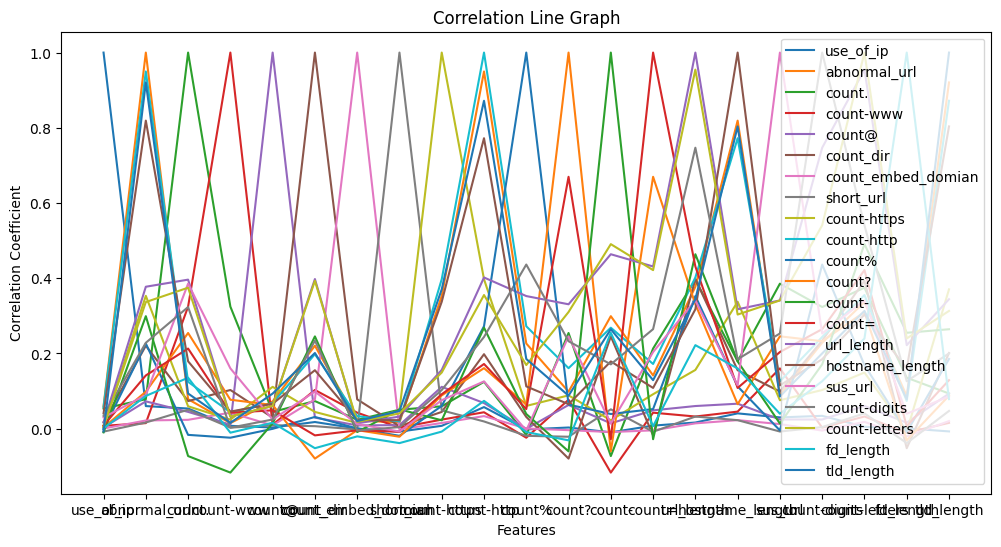

In [ ]:
# Separate data into two groups: phishing and benign
phishing_urls = df[df['type'] == 'phishing'].drop('type', axis=1)
benign_urls = df[df['type'] == 'benign'].drop('type', axis=1)

# Concatenate the two groups for correlation analysis
combined_df = pd.concat([phishing_urls, benign_urls])

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot line graph for each feature
plt.figure(figsize=(12, 6))
for feature in correlation_matrix.columns:
    plt.plot(correlation_matrix.index, correlation_matrix[feature], label=feature)

plt.title('Correlation Line Graph')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.show()

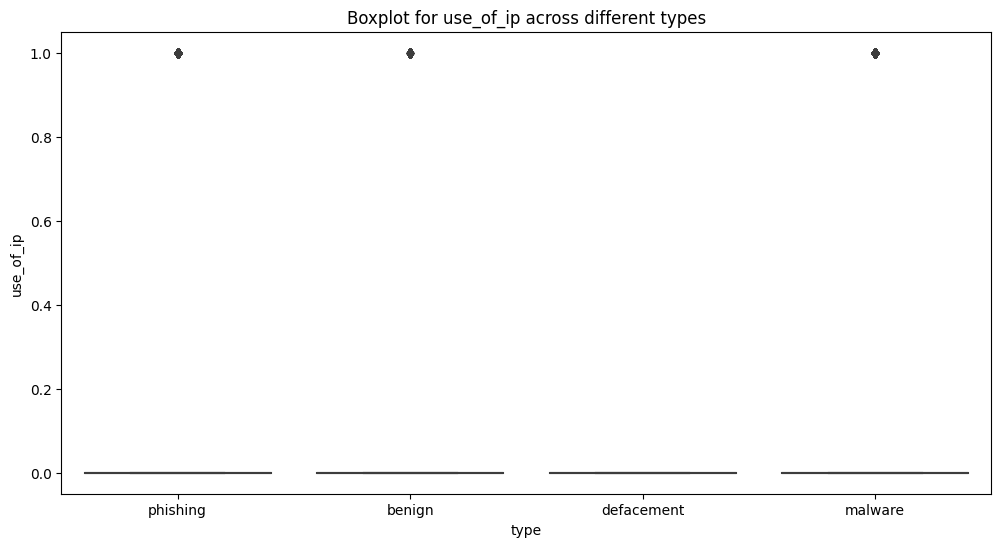

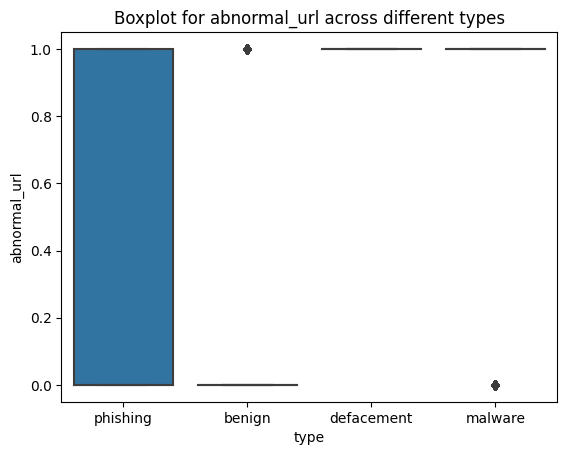

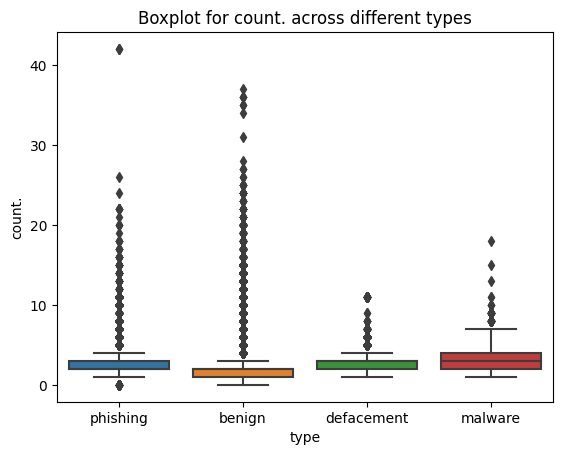

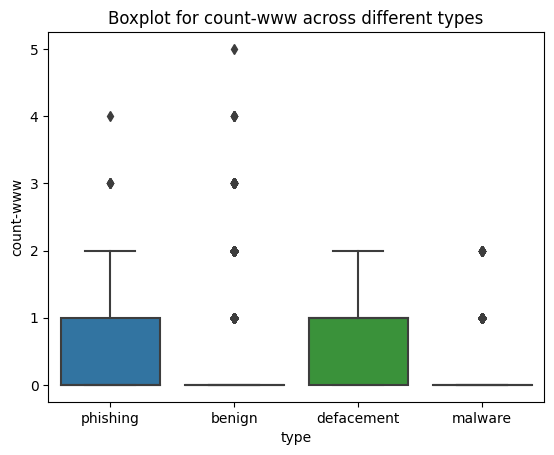

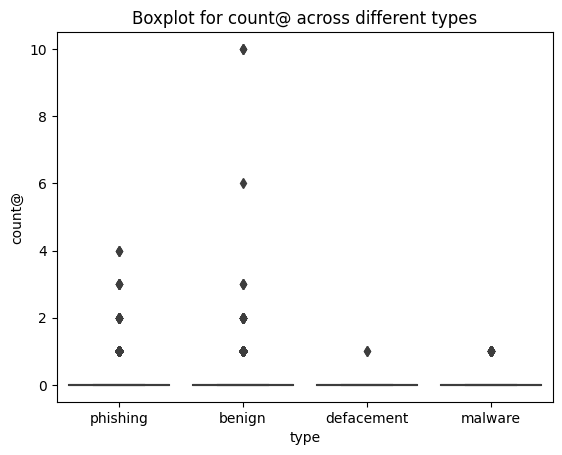

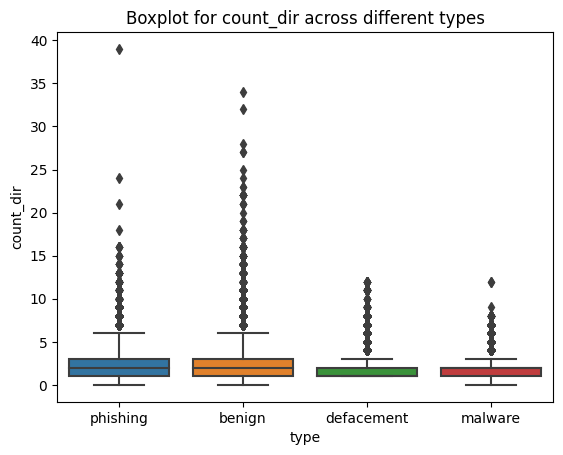

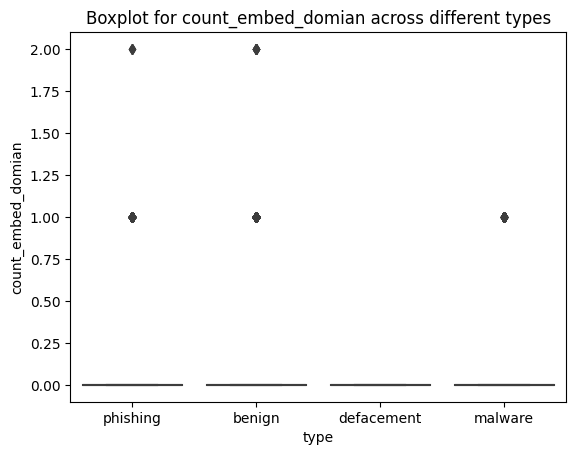

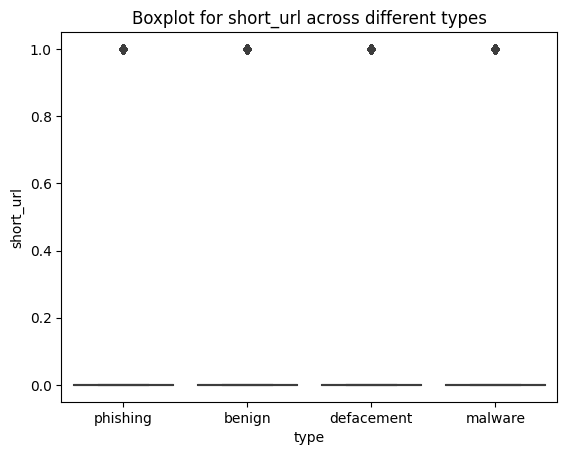

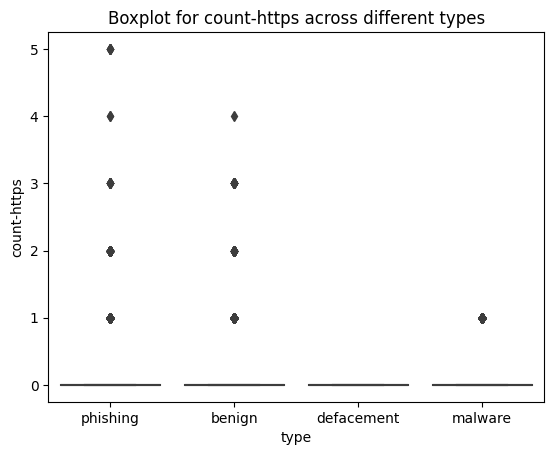

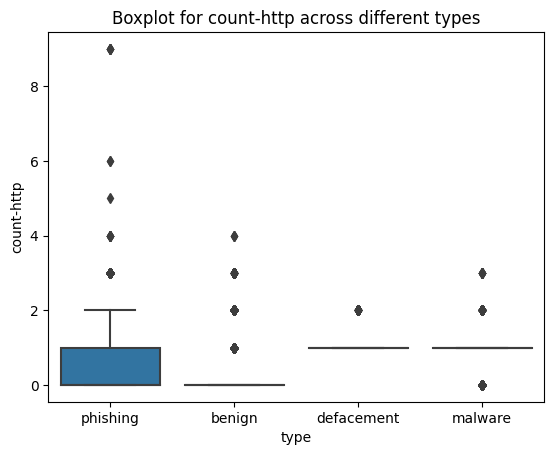

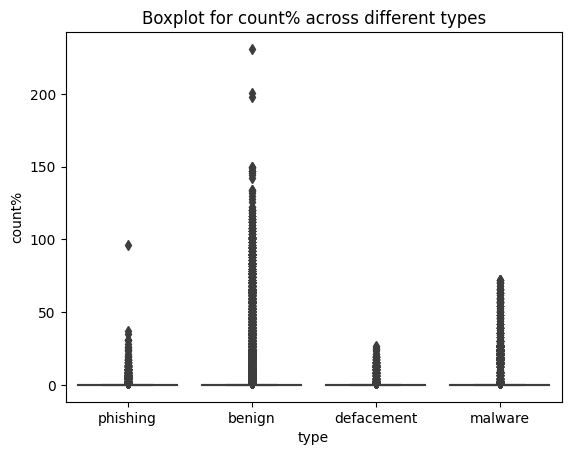

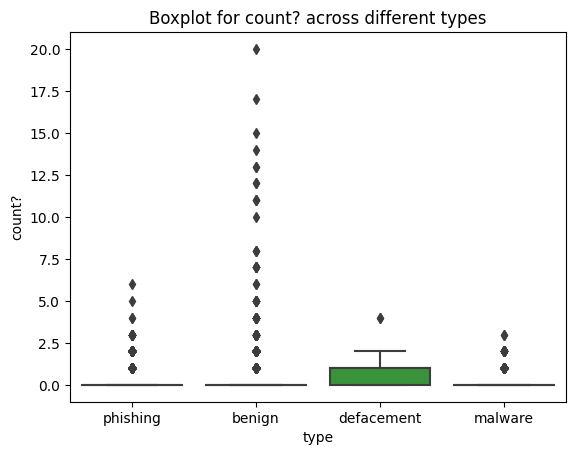

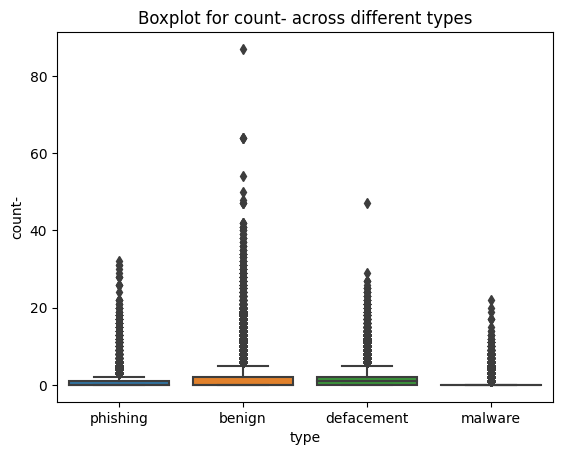

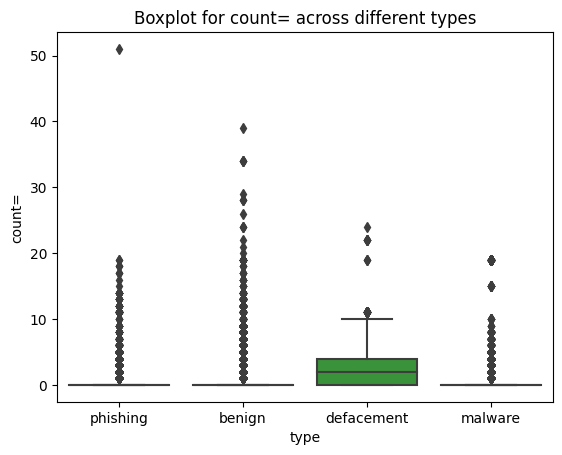

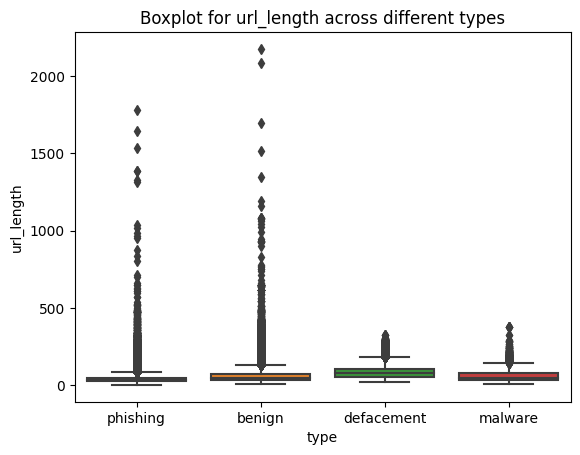

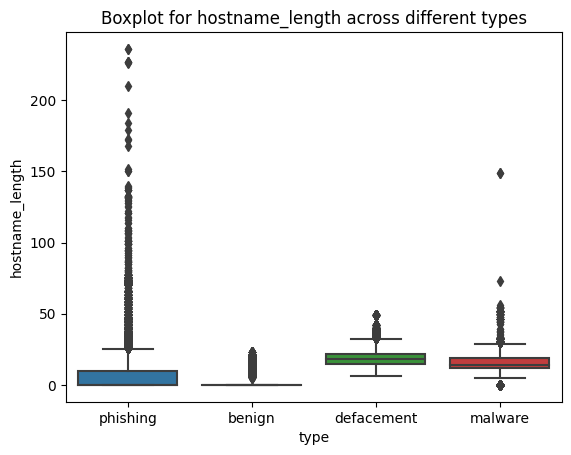

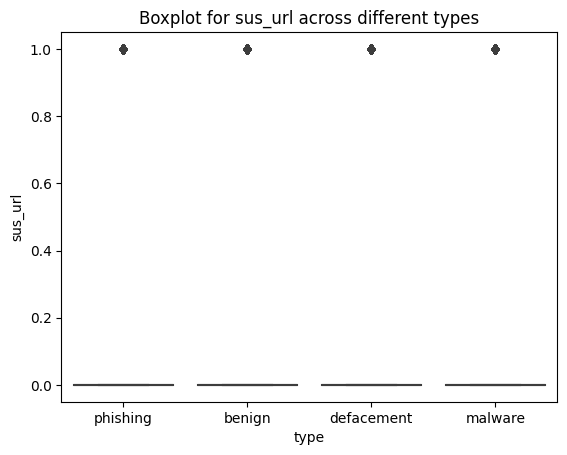

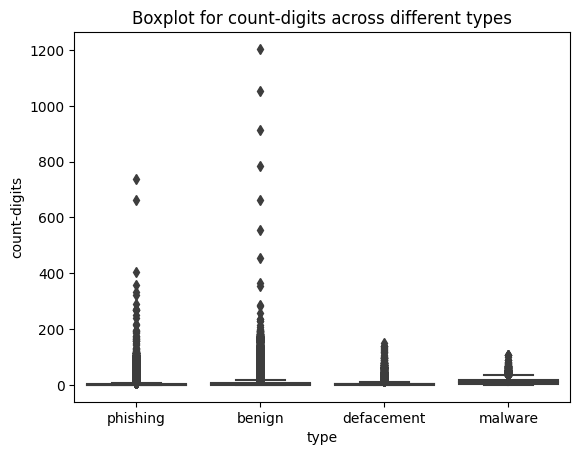

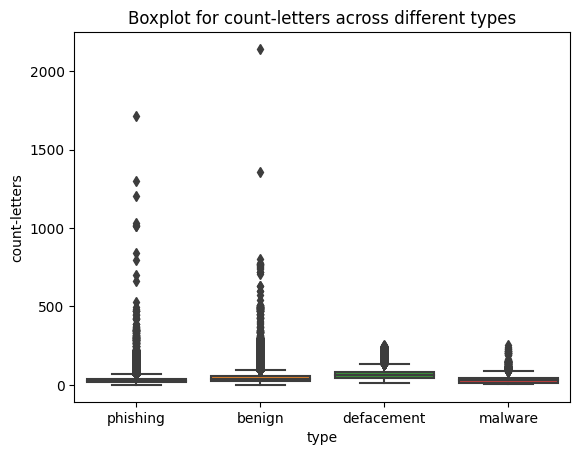

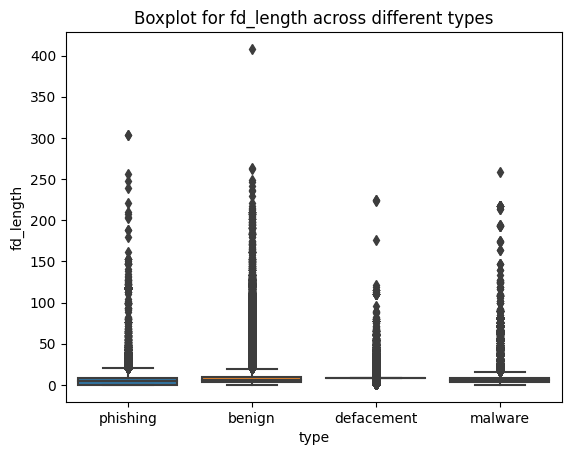

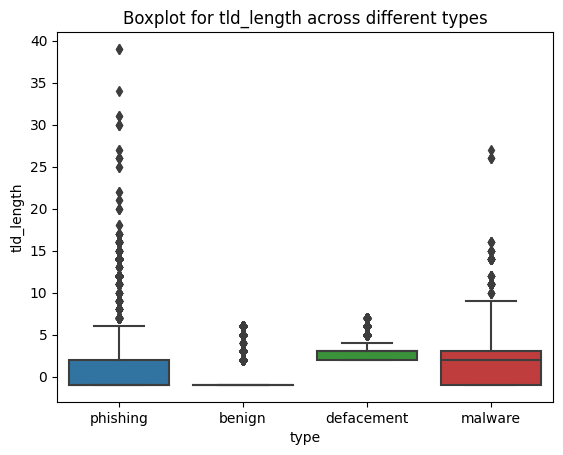

In [ ]:
phishing_urls = df[df['type'] == 'phishing'].drop('type', axis=1)
benign_urls = df[df['type'] == 'benign'].drop('type', axis=1)


# Perform one-way ANOVA for each feature
features = df.columns[1:]  # Exclude 'type'
plt.figure(figsize=(12, 6))

for feature in features:
    sns.boxplot(x='type', y=feature, data=df)
    plt.title(f'Boxplot for {feature} across different types')
    plt.show()

**ANOVA Test**

In [ ]:
from scipy.stats import f_oneway

grouped_data = [df['count-http'][df['type'] == group] for group in df['type'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in means between groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in means between groups.")

F-statistic: 275218.92927557323
P-value: 0.0
Reject the null hypothesis: There is a significant difference in means between groups.


In [ ]:
from scipy.stats import f_oneway

grouped_data = [df['abnormal_url'][df['type'] == group] for group in df['type'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in means between groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in means between groups.")

F-statistic: 342023.1306789601
P-value: 0.0
Reject the null hypothesis: There is a significant difference in means between groups.


In [ ]:
from scipy.stats import f_oneway

grouped_data = [df['count_dir'][df['type'] == group] for group in df['type'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in means between groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in means between groups.")

F-statistic: 6637.107794386427
P-value: 0.0
Reject the null hypothesis: There is a significant difference in means between groups.


**Descriptive Statistics**

In [ ]:
df['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   type                651191 non-null  object
 1   use_of_ip           651191 non-null  int64 
 2   abnormal_url        651191 non-null  int64 
 3   count.              651191 non-null  int64 
 4   count-www           651191 non-null  int64 
 5   count@              651191 non-null  int64 
 6   count_dir           651191 non-null  int64 
 7   count_embed_domian  651191 non-null  int64 
 8   short_url           651191 non-null  int64 
 9   count-https         651191 non-null  int64 
 10  count-http          651191 non-null  int64 
 11  count%              651191 non-null  int64 
 12  count?              651191 non-null  int64 
 13  count-              651191 non-null  int64 
 14  count=              651191 non-null  int64 
 15  url_length          651191 non-null  

In [ ]:
df.isnull().sum()

type                  0
use_of_ip             0
abnormal_url          0
count.                0
count-www             0
count@                0
count_dir             0
count_embed_domian    0
short_url             0
count-https           0
count-http            0
count%                0
count?                0
count-                0
count=                0
url_length            0
hostname_length       0
sus_url               0
count-digits          0
count-letters         0
fd_length             0
tld_length            0
dtype: int64

In [ ]:

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
df.describe()



Summary Statistics:


use_of_ip   abnormal_url         count.      count-www  \
count  651191.000000  651191.000000  651191.000000  651191.000000   
mean        0.011199       0.288711       2.195453       0.195379   
std         0.105233       0.453164       1.490732       0.402825   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         0.000000       0.000000       2.000000       0.000000   
75%         0.000000       1.000000       3.000000       0.000000   
max         1.000000       1.000000      42.000000       5.000000   

              count@      count_dir  count_embed_domian      short_url  \
count  651191.000000  651191.000000       651191.000000  651191.000000   
mean        0.002219       2.317042            0.001533       0.061050   
std         0.054183       1.566924            0.039586       0.239422   
min         0.000000       0.000000            0.000000       0.000000   
25%         0.000000       1.000000            0.000000       0.000000   
50%         0.000000       2.000000            0.000000       0.000000   
75%         0.000000       3.000000            0.000000       0.000000   
max        10.000000      39.000000            2.000000       1.000000   

         count-https     count-http  ...         count?         count-  \
count  651191.000000  651191.000000  ...  651191.000000  651191.000000   
mean        0.025656       0.296738  ...       0.223782       1.550421   
std         0.161594       0.470894  ...       0.441220       2.973790   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       1.000000  ...       0.000000       2.000000   
max         5.000000       9.000000  ...      20.000000      87.000000   

              count=     url_length  hostname_length        sus_url  \
count  651191.000000  651191.000000    651191.000000  651191.000000   
mean        0.603863      60.156831         5.023088       0.066606   
std         1.516960      44.753902         8.911953       0.249338   
min         0.000000       1.000000         0.000000       0.000000   
25%         0.000000      32.000000         0.000000       0.000000   
50%         0.000000      47.000000         0.000000       0.000000   
75%         0.000000      77.000000        11.000000       0.000000   
max        51.000000    2175.000000       236.000000       1.000000   

        count-digits  count-letters      fd_length     tld_length  
count  651191.000000  651191.000000  651191.000000  651191.000000  
mean        5.527409      45.247104       8.843088       0.114509  
std        11.700814      31.624502      11.866214       1.980277  
min         0.000000       0.000000       0.000000      -1.000000  
25%         0.000000      25.000000       4.000000      -1.000000  
50%         2.000000      37.000000       6.000000      -1.000000  
75%         7.000000      58.000000       9.000000       2.000000  
max      1204.000000    2141.000000     408.000000      39.000000  

[8 rows x 21 columns]

In [ ]:
# Grouping the data based on target column
df.groupby('type').mean()

use_of_ip  abnormal_url    count.  count-www    count@  count_dir  \
type                                                                            
benign       0.000208      0.082676  1.938421   0.042980  0.001577   2.505972   
defacement   0.000000      1.000000  2.844926   0.698467  0.000021   1.826078   
malware      0.211255      0.962792  2.814053   0.095787  0.001292   2.078629   
phishing     0.003549      0.263997  2.485246   0.407413  0.007714   2.043204   

            count_embed_domian  short_url  count-https  count-http  ...  \
type                                                                ...   
benign                0.001736   0.069168     0.005821    0.090247  ...   
defacement            0.000000   0.026965     0.000000    1.000778  ...   
malware               0.002645   0.021740     0.207995    0.967774  ...   
phishing              0.001796   0.072638     0.079172    0.282581  ...   

              count?    count-    count=  url_length  hostname_length  \
type                                                                    
benign      0.180781  1.838616  0.322663   57.675429         0.975578   
defacement  0.570099  1.690961  2.324860   86.339395        19.006677   
malware     0.127737  0.462177  0.411900   56.542958        14.504397   
phishing    0.097629  0.471443  0.185451   45.858051         5.826439   

             sus_url  count-digits  count-letters  fd_length  tld_length  
type                                                                      
benign      0.071380      5.607723      43.567345   8.742522   -0.667026  
defacement  0.025939      4.592482      66.861938   9.680832    3.037934  
malware     0.009656     12.588346      31.504121  14.190867    1.518112  
phishing    0.106247      3.680399      35.483419   6.594001    0.188331  

[4 rows x 21 columns]

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

df_x=pd.read_csv('malicious_phish.csv')

print(df.shape)
df.head()


(651191, 22)


type  use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0    phishing          0             0       2          0       0          0   
1      benign          0             0       2          0       0          2   
2      benign          0             0       2          0       0          3   
3  defacement          0             1       3          1       0          1   
4  defacement          0             1       2          0       0          1   

   count_embed_domian  short_url  count-https  ...  count?  count-  count=  \
0                   0          0            0  ...       0       1       0   
1                   0          0            0  ...       0       0       0   
2                   0          0            0  ...       0       0       0   
3                   0          0            0  ...       1       1       4   
4                   0          0            0  ...       1       1       3   

   url_length  hostname_length  sus_url  count-digits  count-letters  \
0          16                0        0             0             13   
1          35                0        0             1             29   
2          31                0        0             1             25   
3          88               21        0             7             63   
4         235               23        0            22            199   

   fd_length  tld_length  
0          0          -1  
1          5          -1  
2          7          -1  
3          9           2  
4          9           3  

[5 rows x 22 columns]

**One Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'type' is the column you want to one-hot encode
df = pd.read_csv("malicious_phish.csv")

# Converting type of columns to category
df['type'] = df['type'].astype('category')

# Create an instance of One-hot-encoder
enc = OneHotEncoder(sparse=False, drop='first')

# Reshape the 'type' column and apply one-hot encoding
encoded_data = enc.fit_transform(df[['type']])

# Create new column names for the one-hot encoded columns
new_columns = [f"{col}_encoded" for col in df['type'].cat.categories[1:]]

# Create a DataFrame with the encoded data and new column names
encoded_df = pd.DataFrame(encoded_data, columns=new_columns)

# Concatenate the original DataFrame and the one-hot encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'type' column
#df.drop(['type'], axis=1, inplace=True)

print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                                                      url        type  \
0                                        br-icloud.com.br    phishing   
1                     mp3raid.com/music/krizz_kaliko.html      benign   
2                         bopsecrets.org/rexroth/cr/1.htm      benign   
3       http://www.garage-pirenne.be/index.php?option=...  defacement   
4       http://adventure-nicaragua.net/index.php?optio...  defacement   
...                                                   ...         ...   
651186            xbox360.ign.com/objects/850/850402.html    phishing   
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing   
651188         www.gamespot.com/xbox360/action/deadspace/    phishing   
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing   
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing   

        defacement_encoded  malware_encoded  phishing_encoded  
0                      0.0              0.0               1

# Regression

**Linear Regression Without Hyperparameter**

Coefficients: [1.81568488 2.81568488]
Intercept: 0.18431511778077359
Mean Squared Error: 0.11996979287238946
R-squared: 0.8987805207911381


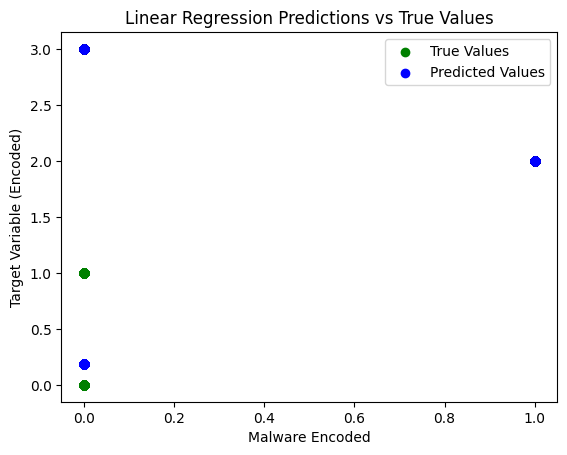

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'type' is a categorical target variable
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Predictor Variables
X = df[['malware_encoded', 'phishing_encoded']]

# Target Variable
y = df['type_encoded']

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Linear Regression
regressor = LinearRegression()

# Train the regressor
regressor.fit(X_train_reg, y_train_reg)

# Predict using the trained regressor
y_pred_reg = regressor.predict(X_test_reg)

coefficients = regressor.coef_
intercept = regressor.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Evaluate the regressor
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize linear regression predictions
plt.scatter(X_test_reg['malware_encoded'], y_test_reg, color='green', label='True Values')
plt.scatter(X_test_reg['malware_encoded'], y_pred_reg, color='blue', label='Predicted Values')
plt.xlabel("Malware Encoded")  # Adjust this label based on your actual predictor variables
plt.ylabel("Target Variable (Encoded)")
plt.title("Linear Regression Predictions vs True Values")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Convert regression predictions to classes (binning)S
y_pred_class = pd.cut(y_pred_reg, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Convert true values to classes (binning)
y_test_class = pd.cut(y_test_reg, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Print Classification Report
classification_rep_reg = classification_report(y_test_class, y_pred_class)
print("Classification Report:\n", classification_rep_reg)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     85778
           1       1.00      0.57      0.73     44461

    accuracy                           0.85    130239
   macro avg       0.91      0.79      0.81    130239
weighted avg       0.88      0.85      0.84    130239



**Linear Regression With Hyperparameter**

Coefficients: [1.81568488 2.81568488]
Intercept: 0.18431511778077359
Mean Squared Error: 0.11996979287238946
R-squared: 0.8987805207911381


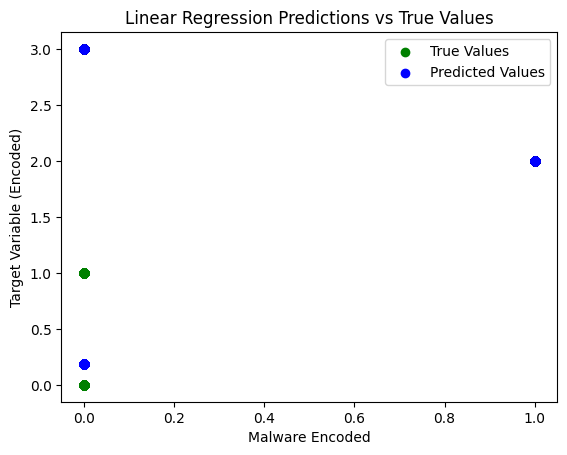

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'type' is a categorical target variable
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Predictor Variables
X = df[['malware_encoded', 'phishing_encoded']]

# Target Variable
y = df['type_encoded']

# Split the dataset into training and testing sets
test_size = 0.2  # Set the test size parameter
random_state = 42  # Set the random state parameter for reproducibility
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Instantiate Linear Regression
regressor = LinearRegression()

# Train the regressor
regressor.fit(X_train_reg, y_train_reg)

# Predict using the trained regressor
y_pred_reg = regressor.predict(X_test_reg)

coefficients = regressor.coef_
intercept = regressor.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Evaluate the regressor
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize linear regression predictions along with the regression line
plt.scatter(X_test_reg['malware_encoded'], y_test_reg, color='green', label='True Values')
plt.scatter(X_test_reg['malware_encoded'], y_pred_reg, color='blue', label='Predicted Values')
plt.xlabel("Malware Encoded")
plt.ylabel("Target Variable (Encoded)")
plt.title("Linear Regression Predictions vs True Values")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Convert regression predictions to classes (binning)
y_pred_class = pd.cut(y_pred_reg, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Convert true values to classes (binning)
y_test_class = pd.cut(y_test_reg, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Print Classification Report
classification_rep_reg = classification_report(y_test_class, y_pred_class)
print("Classification Report:\n", classification_rep_reg)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     85778
           1       1.00      0.57      0.73     44461

    accuracy                           0.85    130239
   macro avg       0.91      0.79      0.81    130239
weighted avg       0.88      0.85      0.84    130239



**Logistic Regression Without Hyperparameter**

Logistic Regression Accuracy: 0.8533158270564116


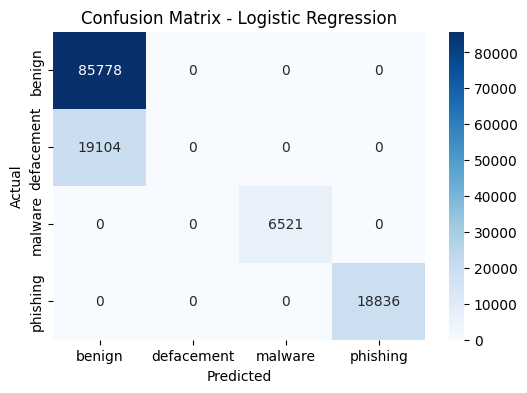

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'type' is a categorical target variable
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Predictor Variables
X = df[['malware_encoded', 'phishing_encoded']]

# Target Variable
y = df['type_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Logistic Regression
logreg_classifier = LogisticRegression()

# Train the Logistic Regression model
logreg_classifier.fit(X_train, y_train)

# Predict using the trained Logistic Regression model
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Print Classification Report
classification_rep_reg = classification_report(y_test, y_pred_logreg)
print("Classification Report:\n", classification_rep_reg)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     85778
           1       0.00      0.00      0.00     19104
           2       1.00      1.00      1.00      6521
           3       1.00      1.00      1.00     18836

    accuracy                           0.85    130239
   macro avg       0.70      0.75      0.72    130239
weighted avg       0.73      0.85      0.79    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression With Hyperparameters**

Best C: 0.001
Logistic Regression Accuracy: 0.8533158270564116


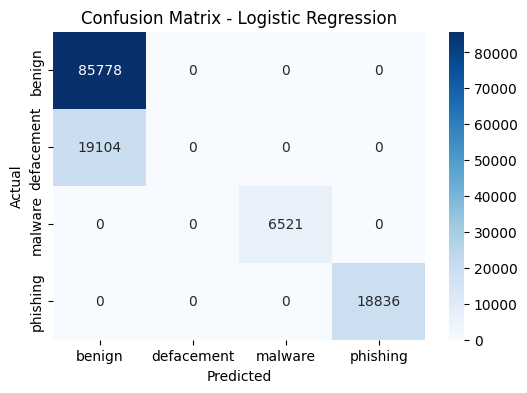

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'type' is a categorical target variable
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Predictor Variables
X = df[['malware_encoded', 'phishing_encoded']]

# Target Variable
y = df['type_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up Logistic Regression with hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg_classifier = LogisticRegression()

grid_search = GridSearchCV(logreg_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']

# Instantiate Logistic Regression with the best hyperparameters
best_logreg_classifier = LogisticRegression(C=best_C)

# Train the Logistic Regression model
best_logreg_classifier.fit(X_train, y_train)

# Predict using the trained Logistic Regression model
y_pred_logreg = best_logreg_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Best C:", best_C)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
# Print Classification Report
classification_rep_reg = classification_report(y_test, y_pred_logreg)
print("Classification Report:\n", classification_rep_reg)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     85778
           1       0.00      0.00      0.00     19104
           2       1.00      1.00      1.00      6521
           3       1.00      1.00      1.00     18836

    accuracy                           0.85    130239
   macro avg       0.70      0.75      0.72    130239
weighted avg       0.73      0.85      0.79    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Lasso Regression Without Hyperparameters**

Mean Squared Error: 0.6002401928530006
R-squared: 0.4935725213309904


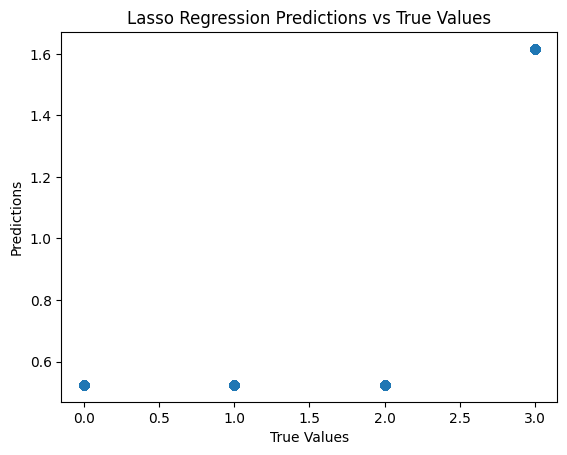

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'type_encoded' is a numeric target variable
y_reg = df['type_encoded']

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Instantiate Lasso Regression with a specific alpha value
lasso_reg = Lasso(alpha=0.2)  # You can adjust the alpha value

# Train the Lasso Regression model
lasso_reg.fit(X_train_reg, y_train_reg)

# Predict using the trained model
y_pred_reg = lasso_reg.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize Lasso Regression predictions
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Lasso Regression Predictions vs True Values")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Convert regression predictions to binary classes (you might need to adjust the threshold)
y_pred_class = (y_pred_reg > 0.5).astype(int)

# Convert true values to binary classes
y_test_class = (y_test_reg > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.3413800781639908


In [ ]:
from sklearn.metrics import classification_report

# Convert regression predictions to classes (binning)
y_pred_class = pd.cut(y_pred_reg, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Convert true values to classes (binning)
y_test_class = pd.cut(y_test_reg, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Print Classification Report
classification_rep_reg = classification_report(y_test_class, y_pred_class)
print("Classification Report:\n", classification_rep_reg)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     85778
           1       0.34      1.00      0.51     44461

    accuracy                           0.34    130239
   macro avg       0.17      0.50      0.25    130239
weighted avg       0.12      0.34      0.17    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Lasso Regression With Hyperparameters**

Best Alpha: 0.001
Mean Squared Error: 0.1200104537703419
R-squared: 0.8987462148644847


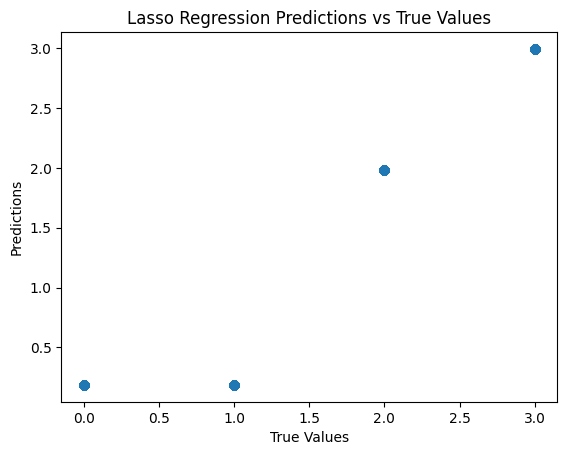

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'type_encoded' is a numeric target variable
y_reg = df['type_encoded']

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Define the Lasso Regression model
lasso_reg = Lasso()

# Define the hyperparameter grid to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_reg, y_train_reg)

# Get the best hyperparameter
best_alpha = grid_search.best_params_['alpha']

# Instantiate Lasso Regression with the best hyperparameter
best_lasso_reg = Lasso(alpha=best_alpha)

# Train the Lasso Regression model with the best hyperparameter
best_lasso_reg.fit(X_train_reg, y_train_reg)

# Predict using the trained model
y_pred_reg = best_lasso_reg.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize Lasso Regression predictions
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Lasso Regression Predictions vs True Values")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Convert regression predictions to binary classes (you might need to adjust the threshold)
y_pred_class = (y_pred_reg > 0.5).astype(int)

# Convert true values to binary classes
y_test_class = (y_test_reg > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.8533158270564116


In [ ]:
from sklearn.metrics import classification_report

# Convert regression predictions to classes (binning)
y_pred_class = pd.cut(y_pred_reg, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Convert true values to classes (binning)
y_test_class = pd.cut(y_test_reg, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Print Classification Report
classification_rep_reg = classification_report(y_test_class, y_pred_class)
print("Classification Report:\n", classification_rep_reg)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     85778
           1       1.00      0.57      0.73     44461

    accuracy                           0.85    130239
   macro avg       0.91      0.79      0.81    130239
weighted avg       0.88      0.85      0.84    130239



**Ridge Regression without Hyperparameters**

Accuracy: 0.3413800781639908
Confusion Matrix:
 [[    0 85778     0]
 [    0 19104     0]
 [    0     0 25357]]


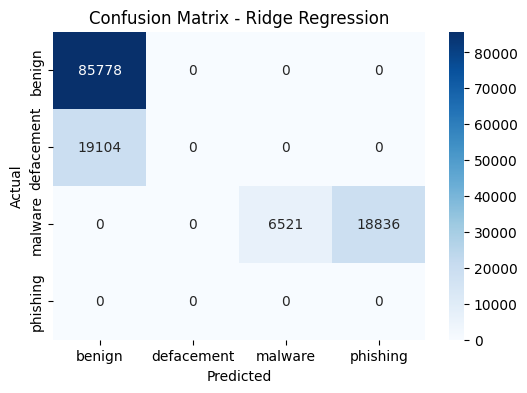

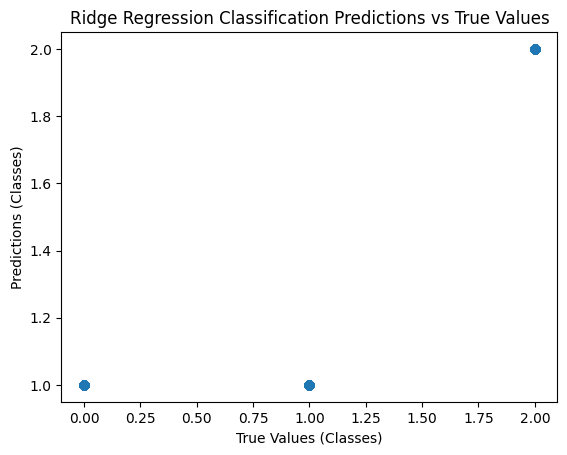

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'type_encoded' is a categorical target variable
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Predictor Variables
X = df[['malware_encoded', 'phishing_encoded']]

# Target Variable (classification)
y_class = df['type_encoded']

# Binning the continuous target into classes for classification
y_class = pd.cut(y_class, bins=[-float('inf'), 0, 1, float('inf')], labels=[0, 1, 2])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Instantiate Ridge Regression with a specific alpha value
ridge_reg = Ridge(alpha=0.2)

# Train the Ridge Regression model
ridge_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred = ridge_reg.predict(X_test)

# Convert predictions to class labels
y_pred_class = pd.cut(y_pred, bins=[-float('inf'), 0, 1, float('inf')], labels=[0, 1, 2])

# Evaluate the model for classification
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ridge Regression')
plt.show()


# Visualize Ridge Regression predictions
plt.scatter(y_test, y_pred_class)
plt.xlabel("True Values (Classes)")
plt.ylabel("Predictions (Classes)")
plt.title("Ridge Regression Classification Predictions vs True Values")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Convert regression predictions to classes (binning)
y_pred_class = pd.cut(y_pred_reg, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Convert true values to classes (binning)
y_test_class = pd.cut(y_test_reg, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Print Classification Report
classification_rep_reg = classification_report(y_test, y_pred_logreg)
print("Classification Report:\n", classification_rep_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     85778
           1       0.00      0.00      0.00     19104
           2       1.00      0.26      0.41     25357
           3       0.00      0.00      0.00         0

    accuracy                           0.71    130239
   macro avg       0.45      0.31      0.33    130239
weighted avg       0.73      0.71      0.67    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Ridge Regression with Hyperparameters**

Best Alpha: 0.01
Accuracy: 0.3413800781639908
Confusion Matrix:
 [[    0 85778     0]
 [    0 19104     0]
 [    0     0 25357]]


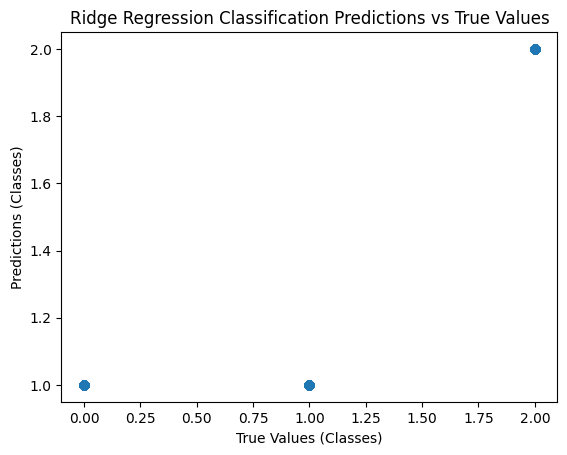

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

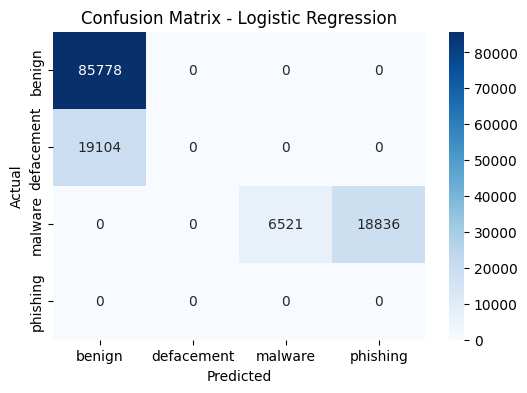

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'type_encoded' is a categorical target variable
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Predictor Variables
X = df[['malware_encoded', 'phishing_encoded']]

# Target Variable (classification)
y_class = df['type_encoded']

# Binning the continuous target into classes for classification
y_class = pd.cut(y_class, bins=[-float('inf'), 0, 1, float('inf')], labels=[0, 1, 2])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Set up Ridge Regression with hyperparameter tuning
ridge_reg = Ridge()

# Define the hyperparameter grid to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Instantiate Ridge Regression with the best hyperparameters
best_ridge_reg = Ridge(alpha=best_alpha)

# Train the Ridge Regression model
best_ridge_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred = best_ridge_reg.predict(X_test)

# Convert predictions to class labels
y_pred_class = pd.cut(y_pred, bins=[-float('inf'), 0, 1, float('inf')], labels=[0, 1, 2])

# Evaluate the model for classification
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print("Best Alpha:", best_alpha)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Visualize Ridge Regression predictions
plt.scatter(y_test, y_pred_class)
plt.xlabel("True Values (Classes)")
plt.ylabel("Predictions (Classes)")
plt.title("Ridge Regression Classification Predictions vs True Values")
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Rigid Regression')

In [ ]:
classification_rep_reg = classification_report(y_test, y_pred_class)
print("Classification Report:\n", classification_rep_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     85778
           1       0.18      1.00      0.31     19104
           2       1.00      1.00      1.00     25357

    accuracy                           0.34    130239
   macro avg       0.39      0.67      0.44    130239
weighted avg       0.22      0.34      0.24    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
